In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
out_dir = '/Users/tanshi/Desktop/SIP/'
execfile(out_dir+'plot_routines.py')

In [2]:
VI_besancon = np.loadtxt(out_dir+'besanconCMDdata_cut.txt', usecols=(0),unpack=True)
print VI_besancon
print len(VI_besancon)

mv_besancon = np.loadtxt(out_dir+'besanconCMDdata_cut.txt', usecols=(1),unpack=True)
print mv_besancon
print len(mv_besancon)

distance_besancon = np.loadtxt(out_dir+'besanconCMDdata_cut.txt', usecols=(2),unpack=True)
print distance_besancon
print np.max(VI_besancon)

[1.182 0.987 1.191 ... 0.248 0.318 0.178]
1836
[20.595 20.217 21.284 ... 23.921 24.216 23.965]
1836
[0.091 0.111 0.131 ... 1.965 1.965 2.115]
1.322


In [3]:
Mv_6 = np.loadtxt('Table_Mass_0.6.txt',usecols=(3),unpack=True)
print Mv_6

# VI_6 = np.loadtxt('Table_Mass_0.6.txt',usecols=(15),unpack=True)
# print VI_6

VR_6 = np.loadtxt('Table_Mass_0.6.txt',usecols=(6),unpack=True)
RI_6 = np.loadtxt('Table_Mass_0.6.txt',usecols=(8),unpack=True)
VI_6 = VR_6 + RI_6
print VI_6
print len(VI_6)

[18.984 18.491 18.097 17.774 17.51  17.285 17.082 16.883 16.684 16.478
 16.257 16.012 15.742 15.462 15.178 14.909 14.658 14.222 13.865 13.557
 13.281 13.023 12.783 12.554 12.342 12.149 11.977 11.834 11.714 11.615
 11.544 11.476 11.406 11.336 11.27  11.207 11.148 11.09  11.036 10.982
 10.682 10.241  9.814  9.433  9.19   8.986  8.793  8.616  8.446  8.286
  8.126  7.968  7.795  7.589  7.388  7.183  6.951]
[-2.516 -1.547 -0.779 -0.152  0.374  0.797  1.095  1.265  1.33   1.327
  1.287  1.225  1.152  1.071  0.988  0.91   0.838  0.712  0.605  0.514
  0.437  0.367  0.302  0.24   0.18   0.125  0.073  0.029 -0.01  -0.042
 -0.066 -0.087 -0.106 -0.122 -0.135 -0.146 -0.156 -0.164 -0.172 -0.179
 -0.216 -0.265 -0.301 -0.315 -0.324 -0.33  -0.334 -0.339 -0.342 -0.344
 -0.346 -0.349 -0.351 -0.353 -0.354 -0.356 -0.358]
57


1.322


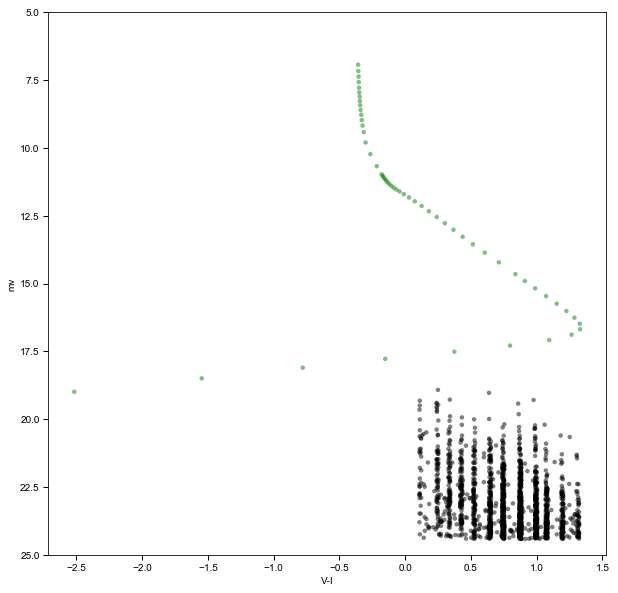

In [4]:
fig=plt.figure(figsize=(10,10))
plt.scatter(VI_besancon, mv_besancon, c='black',edgecolors='none',s=20,alpha=0.5)
plt.scatter(VI_6, Mv_6, c='green',edgecolors='none',s=20,alpha=0.5)
plt.ylim(25,5)
plt.xlabel('V-I')
plt.ylabel('mv')
print np.max(VI_besancon)

In [5]:
Mv_wd = np.array([])
for j in range(len(VI_besancon)):
    check = 0
    for i in range(len(VI_6)):
        if (VI_besancon[j] < VI_6[i]) and (VI_besancon[j] > VI_6[i+1]):
            weight1 = ((VI_6[i] - VI_besancon[j]) / (VI_6[i] - VI_6[i+1])) * 100
            weight2 = ((VI_besancon[j] - VI_6[i+1]) / (VI_6[i] - VI_6[i+1])) * 100
            Mv_wd = np.append(Mv_wd, ((Mv_6[i]*weight2) + (Mv_6[i+1]*weight1)) / (weight1 + weight2))
            check += 1
            break
        elif (VI_besancon[j] == VI_6[i]):
            Mv_wd = np.append(Mv_wd, Mv_6[i])
            check += 1
            break
    if not check :
        print VI_besancon[j]
print(len(Mv_wd))
print np.max(VI_6)

1836
1.33


In [6]:
print len(Mv_wd)
print len(mv_besancon)

distance_wd_kpc = np.array([])
for i in range(len(mv_besancon)):
    distance_wd_kpc = np.append(distance_wd_kpc, (10 ** (((mv_besancon[i] - Mv_wd[i]) + 5) / 5)/1000))
print np.max(distance_wd_kpc)
print distance_wd_kpc
print (distance_besancon)

1836
1836
2.690115390190198
[0.08879903 0.10197407 0.12010212 ... 1.85135764 1.88271514 2.11837887]
[0.091 0.111 0.131 ... 1.965 1.965 2.115]


In [7]:
# for i in range (len(distance_wd_kpc)):
#     print abs(distance_wd_kpc[i] - distance_besancon[i])/distance_besancon[i]*100
# print 
print np.mean(abs(distance_wd_kpc - distance_besancon)/distance_besancon*100)


6.620791814362251
